TUGAS WAJIB

In [1]:
import os
import zipfile
import glob
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/PneumoniaData/pneumonia.zip'
extract_path = '/content/chest_xray'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
original_path = '/content/chest_xray/chest_xray/train'
new_path = '/content/chest_xray_multiclass/train'

os.makedirs(os.path.join(new_path, 'NORMAL'), exist_ok=True)
os.makedirs(os.path.join(new_path, 'BACTERIAL'), exist_ok=True)
os.makedirs(os.path.join(new_path, 'VIRAL'), exist_ok=True)

# Salin gambar NORMAL
for f in glob.glob(original_path + '/NORMAL/*.jpeg'):
    shutil.copy(f, new_path + '/NORMAL')

# Pisahkan gambar PNEUMONIA menjadi BACTERIAL dan VIRAL berdasarkan nama file
for f in glob.glob(original_path + '/PNEUMONIA/*.jpeg'):
    if 'bacteria' in f:
        shutil.copy(f, new_path + '/BACTERIAL')
    elif 'virus' in f:
        shutil.copy(f, new_path + '/VIRAL')

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    new_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    new_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4173 images belonging to 3 classes.
Found 1043 images belonging to 3 classes.


In [7]:
base_model = MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # karena 3 kelas
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6451 - loss: 0.8163

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.6455 - loss: 0.8152 - val_accuracy: 0.7210 - val_loss: 0.5971
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.7581 - loss: 0.5629 - val_accuracy: 0.7709 - val_loss: 0.5370
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.7696 - loss: 0.5261 - val_accuracy: 0.7699 - val_loss: 0.5311
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.7779 - loss: 0.4981 - val_accuracy: 0.7459 - val_loss: 0.5538
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.7820 - loss: 0.5009 - val_accuracy: 0.7632 - val_loss: 0.5420
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.7952 - loss: 0.4882 - val_accuracy: 0.7613 - val_loss: 0.5487
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.8030 - loss: 0.4544 - val_accuracy: 0.7613 - val_loss: 0.5469
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.8058 - loss: 0.4498 - val_accuracy: 0.752

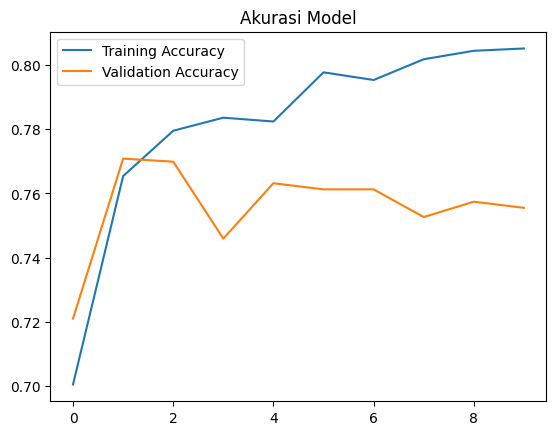

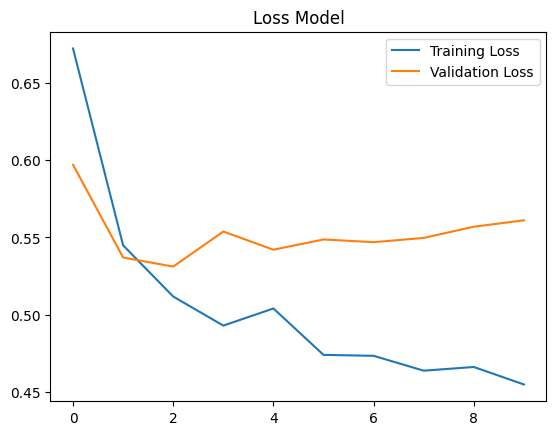

In [9]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.legend()
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step


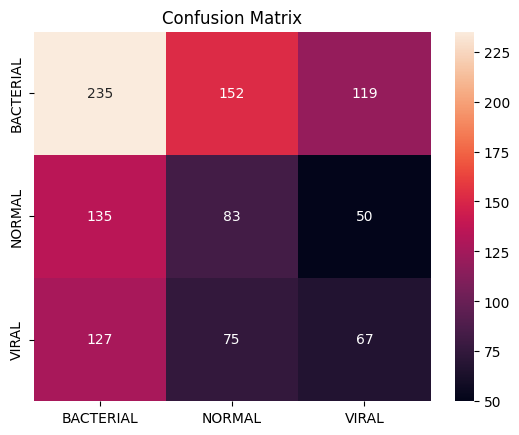

              precision    recall  f1-score   support

   BACTERIAL       0.47      0.46      0.47       506
      NORMAL       0.27      0.31      0.29       268
       VIRAL       0.28      0.25      0.27       269

    accuracy                           0.37      1043
   macro avg       0.34      0.34      0.34      1043
weighted avg       0.37      0.37      0.37      1043



In [10]:
val_data.reset()
predictions = model.predict(val_data)
y_pred = np.argmax(predictions, axis=1)
y_true = val_data.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=val_data.class_indices,
            yticklabels=val_data.class_indices)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=val_data.class_indices.keys()))

In [11]:
model.save('mobilenetv2_pneumonia_3kelas.h5')

In [12]:
model.save('mobilenetv2_pneumonia_3kelas.keras')


BONUS POINT

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ulangi path dataset Anda
data_dir = '/content/chest_xray_multiclass/train'

# Generator dengan augmentasi dan validasi split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data training
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Data validasi
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4173 images belonging to 3 classes.
Found 1043 images belonging to 3 classes.


In [4]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4697 - loss: 1.0783

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 451s 3s/step - accuracy: 0.4698 - loss: 1.0783 - val_accuracy: 0.4851 - val_loss: 1.0498
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 435s 3s/step - accuracy: 0.4874 - loss: 1.0552 - val_accuracy: 0.4851 - val_loss: 1.0515
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 487s 4s/step - accuracy: 0.4747 - loss: 1.0611 - val_accuracy: 0.4851 - val_loss: 1.0532
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 491s 4s/step - accuracy: 0.4788 - loss: 1.0630 - val_accuracy: 0.4851 - val_loss: 1.0496
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 489s 4s/step - accuracy: 0.4861 - loss: 1.0546 - val_accuracy: 0.4851 - val_loss: 1.0500
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 453s 3s/step - accuracy: 0.4972 - loss: 1.0512 - val_accuracy: 0.4851 - val_loss: 1.0513
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 421s 3s/step - accuracy: 0.4756 - loss: 1.0601 - val_accuracy: 0.4851 - val_loss: 1.0496
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 441s 3s/step - accuracy: 0.4823 - loss: 1.0553 - val_accuracy: 0.485